In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ME781/a.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-11-18,28.30,31.10,24.88,27.36,62546300,0.0,0.0
1,1999-11-19,26.70,26.74,24.76,25.11,15234100,0.0,0.0
2,1999-11-22,25.69,27.36,24.92,27.36,6577800,0.0,0.0
3,1999-11-23,26.43,27.13,24.88,24.88,5975600,0.0,0.0
4,1999-11-24,24.95,26.08,24.88,25.54,4843200,0.0,0.0


In [ ]:
# Dropping the rows with null values
df = df.dropna()

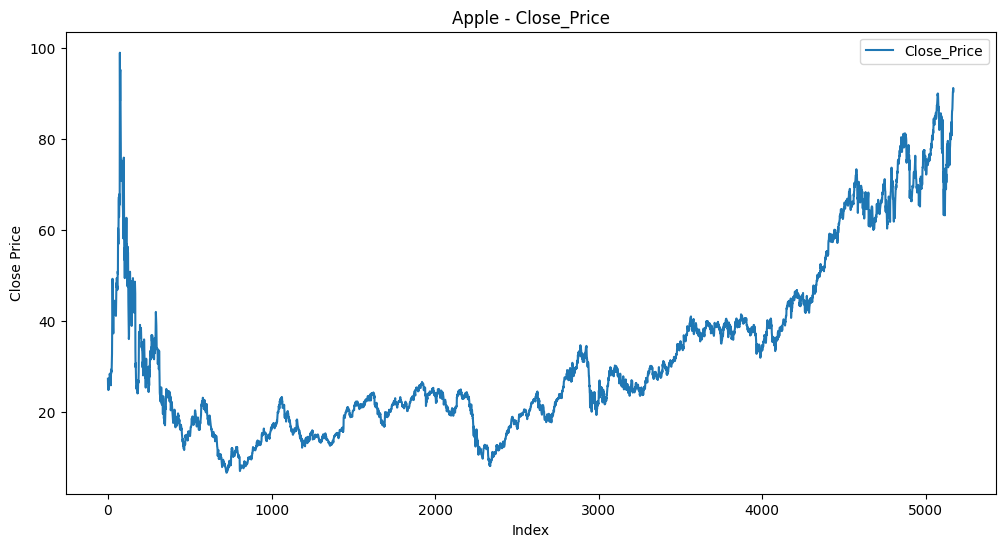

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label='Close_Price')
plt.title('Apple - Close_Price')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()

In [ ]:
# Creating an array of close values and normalising them
df_close = df.Close.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)

In [ ]:
# Splitting the data into testing and training sets
training_size=int(len(df_close)*0.8)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]
print("Train_data: ", train_data.shape)
print("Test_data: ", test_data.shape)

Train_data:  (4135, 1)
Test_data:  (1034, 1)


In [ ]:
train_data

array([[0.22370563],
       [0.19928362],
       [0.22370563],
       ...,
       [0.36209704],
       [0.35884077],
       [0.36155433]])

In [ ]:
# Creating batches of dataset of length = timestep
def create_dataset(df, timestep):
    df_X, df_y = [], []
    for i in range(len(df) - timestep):
        df_X.append(df[i:i + timestep, 0])
        df_y.append(df[i + timestep, 0])
    return np.array(df_X), np.array(df_y)

In [ ]:
# Sliding window length= 180 days : Hyperparameter
timestep=180

X_train_lstm, y_train_lstm = create_dataset(train_data, timestep)
X_test_lstm, y_test_lstm = create_dataset(test_data, timestep)

X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0],X_train_lstm.shape[1] , 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0],X_test_lstm.shape[1] , 1)

print("X_train: ", X_train_lstm.shape)
print("y_train: ", y_train_lstm.shape)
print("X_test: ", X_test_lstm.shape)
print("y_test", y_test_lstm.shape)

X_train:  (3955, 180, 1)
y_train:  (3955,)
X_test:  (854, 180, 1)
y_test (854,)


(3955,)